In [81]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


df=pd.read_csv('forestfires.csv')
print("Head:", df.head())
print("Statistical Description:", df.describe())

Head:    X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0
Statistical Description:                 X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900    5.520111   64.046482  248.066192    4.559477   
min      1.000000    2.000000   18.700000    1.100000    7.900000    0.000000   
25%      3.000000    4.000000   90.200000   68.600000  437.700000    6.500000   
50%      4.000000    4.000000   91.600000  108.300000  66

In [82]:
# Encode Data
df.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
df.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

(13, 0)

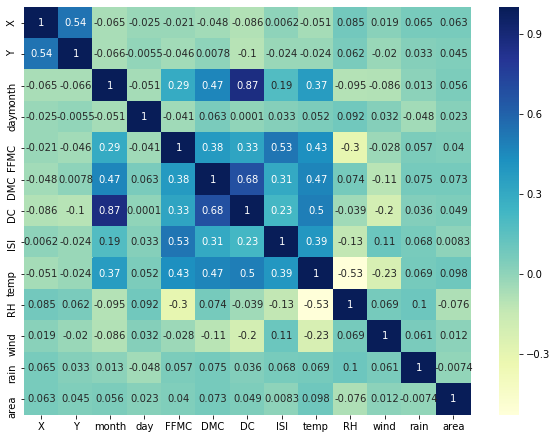

In [83]:
# Observe correlations between features and target

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

corr = df.corr()
plt.figure(figsize=(10,7.5))
ax = sns.heatmap(corr,
       annot = True,
       cmap="YlGnBu")

ax.set_ylim(13, 0)

In [84]:
# Instantiate features vs target
X = df.drop(['area'], axis=1)
y = df['area']

# Split data into test and train

import sklearn.model_selection


X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,
                                    y, test_size = 0.33, random_state = 5)

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [93]:
num_instances = len(X)

models = []
models.append(('LiR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('Bag_Re', BaggingRegressor()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('ExtraTreesRegressor', ExtraTreesRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))
# models.append(('LgRg', LogisticRegression()))

# Evaluations
results = []
names = []
scoring = []

for name, model in models:
    # Fit the model
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    # Evaluate the model
#     score = explained_variance_score(y_test, y_pred)
    score = model.score(X_test, y_test)
    mae = mean_absolute_error(y_pred, y_test)
    results.append(mae)
    names.append(name)
    
#     msg = "%s: %f (%f)" % (name, score, mae)
    print(f'name: {name}, score: {score}, mae: {mae}')

name: LiR, score: -0.00047479787801485435, mae: 22.320291880451393
name: Ridge, score: -0.0004742027175181907, mae: 22.309704876216905
name: Lasso, score: 0.0017273360128835515, mae: 21.403429503249427
name: ElasticNet, score: 0.002348498392865439, mae: 21.135206440196924
name: Bag_Re, score: -0.1730410286284596, mae: 27.781912768031187
name: RandomForest, score: -0.1594725646880768, mae: 26.360880604288493
name: ExtraTreesRegressor, score: -0.16088712760838542, mae: 24.17046783625731
name: KNN, score: -0.14555263028665433, mae: 24.700128654970758
name: CART, score: -0.4530648639591777, mae: 24.700058479532164
name: SVM, score: -0.026852762748455605, mae: 15.290060743679012


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Determine risk of fire given current conditions on a given day

In [28]:
# Update target vector to 1 if there was a fire, 0 if there was not

# for i in range(0, len(y)):
#     if y.iloc[i] > 0:
#         y.iloc[i] = 1
#     else:
#         y.iloc[i] = 0

In [94]:
# Instantiate logistic regression model
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='lbfgs')
clf.fit(X_train, y_train)

ValueError: Unknown label type: 'continuous'

In [43]:
# Determine accuracy of model
score = clf.score(X_test, y_test)
print(score)

0.543859649122807


In [53]:
# Try other logistic regression solvers to attempt to improve model accuracy
clf = LogisticRegression(solver='liblinear')
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(score)

clf = LogisticRegression(solver='newton-cg')
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(score)

clf = LogisticRegression(random_state=5, solver='lbfgs',
                        multi_class='multinomial')
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(score)

# That certainly wasn't any help....

0.543859649122807
0.543859649122807
0.543859649122807


### Predict burned area

In [59]:
df=pd.read_csv('forestfires.csv')
df.head()

# Encode Data
df.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
df.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

dataset = df.values
X = dataset[:,0:12]
y = dataset[:,12]